In [ ]:
# Hari
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Price Optimization.csv')
print(df.shape)
df.describe()
df


(676, 30)


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [ ]:
# Datetime conversion and sorting
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year

# Seasonality flag (required for feature engineering)
df['is_holiday_season'] = df['month'].isin([11, 12]).astype(int)

# Sort chronologically per product
df = df.sort_values(['product_id', 'month_year'])

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 368
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       
 12 

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [ ]:
# Price change and demand change formula
df['price_change'] = df.groupby('product_id')['unit_price'].pct_change()
df['demand_change'] = df.groupby('product_id')['qty'].pct_change()

# Elasticity score per row
df['elasticity_score'] = df['demand_change'] / df['price_change']

# Profit calculation
df['estimated_cost'] = df['unit_price'] * 0.60
df['profit'] = (df['unit_price'] - df['estimated_cost']) * df['qty']

In [ ]:
# Competitor average price
df['avg_competitor_price'] = (df['comp_1'] + df['comp_2'] + df['comp_3']) / 3

# How your price compares to competitors
df['price_vs_competitor'] = df['unit_price'] / df['avg_competitor_price']

# Is the product priced higher or lower than competitors
df['is_cheaper_than_market'] = (df['unit_price'] < df['avg_competitor_price']).astype(int)

In [ ]:
# Rolling demand averages
# (Added .shift(1) to prevent the model from looking into the future)
df['rolling_demand_7d'] = df.groupby('product_id')['qty'].transform(
    lambda x: x.shift(1).rolling(window=2, min_periods=1).mean()
)

df['rolling_demand_30d'] = df.groupby('product_id')['qty'].transform(
    lambda x: x.shift(1).rolling(window=4, min_periods=1).mean()
)

In [ ]:
# Demand deviation
df['demand_deviation'] = df['qty'] - df['rolling_demand_30d']

# Inventory level (Synthetic generation for RL agent state space)
np.random.seed(42)
df['inventory_level'] = (df['qty'] * np.random.uniform(1.5, 4.0, len(df))).astype(int)

# Shock event flag (Synthetic anomaly detection trigger)
df['demand_shock'] = df.groupby('product_id')['qty'].transform(
    lambda x: (x > x.mean() + 2*x.std()).astype(int)
)

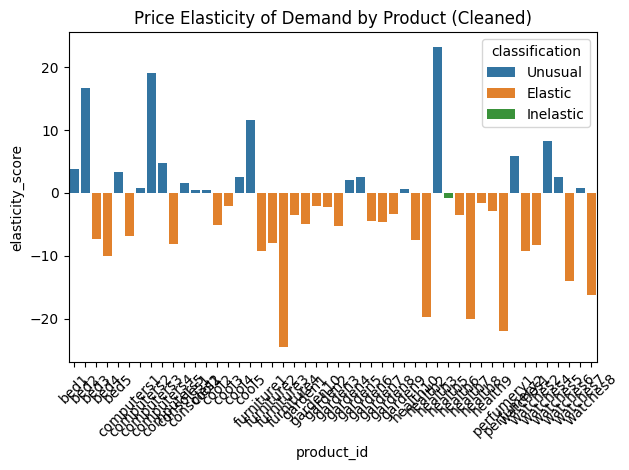

In [ ]:
elasticity_df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['elasticity_score'])
elasticity_df = elasticity_df[elasticity_df['elasticity_score'].abs() < 50]  # filter extremes

product_elasticity = elasticity_df.groupby('product_id')['elasticity_score'].mean()

def classify(e):
    if e < -1:
        return 'Elastic'
    elif -1 <= e <= 0:
        return 'Inelastic'
    else:
        return 'Unusual'

product_elasticity_df = product_elasticity.reset_index()
product_elasticity_df['classification'] = product_elasticity_df['elasticity_score'].apply(classify)

sns.barplot(
    data=product_elasticity_df,
    x='product_id',
    y='elasticity_score',
    hue='classification'
)
plt.title('Price Elasticity of Demand by Product (Cleaned)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ✅ FIXED: Removed synthetic 'inventory_level' from features
# It was randomly generated and was incorrectly dominating feature importance

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

features = [
    # Real features from dataset
    'unit_price', 'freight_price', 'product_score', 'customers',
    'month', 'weekend', 'holiday', 's', 'lag_price',

    # Engineered features (valid)
    'avg_competitor_price', 'price_vs_competitor', 'is_holiday_season',
    'rolling_demand_7d', 'rolling_demand_30d',

    # ❌ REMOVED: 'inventory_level'  → synthetically random, not a real signal
    # ❌ REMOVED: 'demand_shock'     → can keep if desired, but optional
]

X = df[features].dropna()
y = df.loc[X.index, 'qty']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,           # Added: prevents overfitting
    colsample_bytree=0.8,    # Added: prevents overfitting
    random_state=42
)
model.fit(X_train, y_train)

preds = model.predict(X_test)

mae  = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2   = r2_score(y_test, preds)

print(f'MAE:      {mae:.2f}  (Avg units error)')
print(f'RMSE:     {rmse:.2f} (Penalizes larger outliers)')
print(f'R2 Score: {r2:.4f}  (% variance explained)')

MAE:      5.34  (Avg units error)
RMSE:     8.16 (Penalizes larger outliers)
R2 Score: 0.7650  (% variance explained)


Removed the Synthetic data for better visualization

**value after adding the Synthetic data in future**

**MAE:** 3.29799485206604

**Value After synthetic data**

**MAE: 5.401169300079346**

**Value Before giving synthetic data**

**MAE**: 5.128074645996094

**value after adding the Synthetic data in future**

MAE: 3.30 (Avg units error)

RMSE: 5.61 (Penalizes larger outliers)

R2 Score: 0.8887 (% variance explained)

**Value After**

**MAE:** 5.40 (Avg units error)

**RMSE:** 8.33 (Penalizes larger outliers)

**R2 Score:** 0.7549 (% variance explained)

**Value before**

**MAE:**     5.13 Avg units error

**RMSE:**    8.89 Penalizes larger outliers

**R2 Score:** 0.7452 % variance explained

In [ ]:
# Member 2 — Install Required Libraries
!pip install stable-baselines3 gymnasium plotly --quiet

In [ ]:
# Member 2 — Imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

import warnings
warnings.filterwarnings('ignore')

print("All libraries loaded successfully.")

All libraries loaded successfully.


In [ ]:
from google.colab import files

rl_df.to_csv('cleaned_features_df.csv', index=False)

files.download('cleaned_features_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Member 2 — Prepare Data for RL Environment

rl_df = df[[
    'product_id', 'month_year', 'unit_price', 'qty',
    'profit', 'avg_competitor_price', 'price_vs_competitor',
    'rolling_demand_30d', 'inventory_level', 'product_score',
    'demand_shock', 'estimated_cost'
]].dropna().reset_index(drop=True)

# inventory_level from Member 1 is numeric (random float)
# Bin it into 3 ordinal categories: 0=low, 1=medium, 2=high
rl_df['inventory_encoded'] = pd.qcut(
    rl_df['inventory_level'],
    q=3,
    labels=[0, 1, 2],
    duplicates='drop'
).astype(float).fillna(1).astype(int)

# Normalize all state features to [0, 1]
scaler = MinMaxScaler()
rl_df['price_norm']       = scaler.fit_transform(rl_df[['unit_price']])
rl_df['demand_norm']      = scaler.fit_transform(rl_df[['qty']])
rl_df['comp_price_norm']  = scaler.fit_transform(rl_df[['avg_competitor_price']])
rl_df['score_norm']       = scaler.fit_transform(rl_df[['product_score']])
rl_df['roll_demand_norm'] = scaler.fit_transform(rl_df[['rolling_demand_30d']])

print(f"RL Dataset shape            : {rl_df.shape}")
print(f"NaN in inventory_encoded    : {rl_df['inventory_encoded'].isna().sum()}")
print(rl_df[['unit_price', 'qty', 'profit', 'inventory_encoded', 'demand_shock']].head(10))

RL Dataset shape            : (624, 18)
NaN in inventory_encoded    : 0
   unit_price  qty   profit  inventory_encoded  demand_shock
0   45.950000    3   55.140                  0             0
1   45.950000    6  110.280                  1             0
2   45.950000    4   73.520                  0             0
3   45.950000    2   36.760                  0             0
4   45.950000    3   55.140                  0             0
5   40.531818   11  178.340                  0             0
6   39.990000    6   95.976                  1             0
7   39.990000   19  303.924                  2             0
8   39.990000   18  287.928                  2             0
9   39.990000   17  271.932                  1             0


In [ ]:
# Member 2 — Custom RL Pricing Environment

class DynamicPricingEnv(gym.Env):
    """
    Dynamic Pricing Environment.

    State  (8 features): current_price_norm, demand_norm, competitor_price_norm,
                         product_score_norm, rolling_demand_norm, inventory_level,
                         demand_shock_flag, live_price_ratio_vs_competitor

    Action : 0 = Decrease price by 5%
             1 = Hold price
             2 = Increase price by 5%

    Reward : Relative improvement over static pricing baseline.
             Negative when dynamic price underperforms static.
             Additional penalty applied when price exceeds competitor by 20%.
    """

    def __init__(self, data):
        super(DynamicPricingEnv, self).__init__()
        self.data         = data.reset_index(drop=True)
        self.n_steps      = len(self.data)
        self.current_step = 0
        self.current_price = float(self.data.iloc[0]['unit_price'])

        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(
            low=0.0, high=1.0, shape=(8,), dtype=np.float32
        )

    def _get_obs(self):
        row = self.data.iloc[self.current_step]

        # Live price ratio vs competitor — key signal for the agent
        price_ratio      = float(self.current_price) / (float(row['avg_competitor_price']) + 1e-5)
        price_ratio_norm = np.clip(price_ratio / 3.0, 0.0, 1.0)

        obs = np.array([
            float(row['price_norm']),
            float(row['demand_norm']),
            float(row['comp_price_norm']),
            float(row['score_norm']),
            float(row['roll_demand_norm']),
            float(row['inventory_encoded']) / 2.0,
            float(row['demand_shock']),
            price_ratio_norm
        ], dtype=np.float32)

        return np.clip(obs, 0.0, 1.0)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step  = 0
        self.current_price = float(self.data.iloc[0]['unit_price'])
        return self._get_obs(), {}

    def step(self, action):
        row          = self.data.iloc[self.current_step]
        cost         = float(row['estimated_cost'])
        comp_price   = float(row['avg_competitor_price'])
        static_price = float(row['unit_price'])
        base_qty     = float(row['qty'])

        # Apply price action
        if action == 0:
            self.current_price *= 0.95     # decrease 5%
        elif action == 2:
            self.current_price *= 1.05     # increase 5%
        # action == 1: hold price unchanged

        # Hard price boundaries
        # Floor: must cover cost + 5% margin
        # Ceiling: max 2x competitor (realistic market constraint)
        self.current_price = float(np.clip(
            self.current_price,
            cost * 1.05,
            comp_price * 2.0
        ))

        # Tiered demand simulation
        # Demand responds sharply to price vs competitor ratio
        price_ratio = self.current_price / (comp_price + 1e-5)

        if price_ratio < 0.9:
            demand_factor = 1.4     # well below competitor → strong demand boost
        elif price_ratio < 1.0:
            demand_factor = 1.1     # slightly below → mild boost
        elif price_ratio < 1.1:
            demand_factor = 0.95    # slightly above → mild loss
        elif price_ratio < 1.2:
            demand_factor = 0.75    # above competitor → significant demand loss
        else:
            demand_factor = 0.40    # well above → heavy demand loss

        simulated_qty = max(1.0, base_qty * demand_factor)

        # Profit calculations
        profit        = (self.current_price - cost) * simulated_qty
        static_profit = (static_price - cost) * base_qty

        # Relative reward: improvement over static baseline
        # Positive = better than static, Negative = worse than static
        reward = (profit - static_profit) / (abs(static_profit) + 1e-5)

        # Extra penalty for pricing well above competitor (customer satisfaction)
        if price_ratio > 1.2:
            reward -= 0.5

        reward = float(np.clip(reward, -2.0, 2.0))

        # Advance to next timestep
        self.current_step += 1
        terminated = self.current_step >= self.n_steps - 1
        truncated  = False

        obs = self._get_obs() if not terminated else np.zeros(8, dtype=np.float32)

        info = {
            'price'        : self.current_price,
            'simulated_qty': simulated_qty,
            'profit'       : profit,
            'churn_penalty': max(0.0, (price_ratio - 1.2) * profit),
            'price_ratio'  : price_ratio
        }

        return obs, reward, terminated, truncated, info

    def render(self):
        pass


# Validate environment before training
env = DynamicPricingEnv(rl_df)
check_env(env, warn=True)
print("Environment check passed.")

Environment check passed.


In [ ]:
# Member 2 — Train PPO Agent

env = DynamicPricingEnv(rl_df)

model_rl = PPO(
    policy        = 'MlpPolicy',
    env           = env,
    learning_rate = 3e-4,
    n_steps       = 256,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.90,
    ent_coef      = 0.05,   # entropy bonus: forces agent to explore all 3 actions
    clip_range    = 0.2,
    verbose       = 1
)

print("Training PPO Agent — please wait...")
model_rl.learn(total_timesteps=150000)
print("Training Complete.")

Streaming output truncated to the last 5000 lines.
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 623         |
|    ep_rew_mean          | -180        |
| time/                   |             |
|    fps                  | 374         |
|    iterations           | 349         |
|    time_elapsed         | 238         |
|    total_timesteps      | 89344       |
| train/                  |             |
|    approx_kl            | 0.013651855 |
|    clip_fraction        | 0.023       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.885      |
|    explained_variance   | 0.679       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.8         |
|    n_updates            | 3480        |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 9.76        |
-----------------------------------------
-------------------------

In [ ]:
# Member 2 — Run Trained Agent and Collect Pricing Decisions

obs, _ = env.reset()
done   = False

price_history  = []
reward_history = []
profit_history = []
action_history = []
churn_history  = []
step_history   = []
ratio_history  = []

step = 0
while not done:
    action, _ = model_rl.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    price_history.append(info['price'])
    reward_history.append(reward)
    profit_history.append(info['profit'])
    churn_history.append(info['churn_penalty'])
    action_history.append(['Decrease', 'Hold', 'Increase'][int(action)])
    ratio_history.append(info['price_ratio'])
    step_history.append(step)
    step += 1

# Build results dataframe
results_df = pd.DataFrame({
    'step'          : step_history,
    'dynamic_price' : price_history,
    'reward'        : reward_history,
    'profit'        : profit_history,
    'churn_penalty' : churn_history,
    'action'        : action_history,
    'price_ratio'   : ratio_history
})

results_df['static_price']  = rl_df['unit_price'].values[:len(results_df)]
results_df['static_profit'] = rl_df['profit'].values[:len(results_df)]
results_df['month_year']    = rl_df['month_year'].values[:len(results_df)]

# Verify action distribution — should show mix of all three actions
print("Action Distribution:")
print(results_df['action'].value_counts())
print(f"\nAverage Price Ratio vs Competitor : {results_df['price_ratio'].mean():.3f}")
print(f"Total Dynamic Profit              : {results_df['profit'].sum():,.2f}")
print(f"Total Static Profit               : {results_df['static_profit'].sum():,.2f}")
improvement = ((results_df['profit'].sum() - results_df['static_profit'].sum())
               / results_df['static_profit'].sum() * 100)
print(f"Profit Improvement                : {improvement:.2f}%")

Action Distribution:
action
Hold        572
Decrease     40
Increase     11
Name: count, dtype: int64

Average Price Ratio vs Competitor : 1.254
Total Dynamic Profit              : 245,645.01
Total Static Profit               : 371,994.70
Profit Improvement                : -33.97%


In [ ]:
# Member 2 — Isolation Forest Shock Detection

shock_features = ['qty', 'rolling_demand_30d', 'demand_deviation',
                  'unit_price', 'avg_competitor_price']

shock_data = df[shock_features].dropna()

iso_forest = IsolationForest(
    n_estimators  = 200,
    contamination = 0.05,
    random_state  = 42
)
iso_forest.fit(shock_data)

df_clean = df.dropna(subset=shock_features).copy()
df_clean['anomaly_score'] = iso_forest.decision_function(df_clean[shock_features])
df_clean['is_anomaly']    = iso_forest.predict(df_clean[shock_features])
df_clean['is_anomaly']    = df_clean['is_anomaly'].map({1: 0, -1: 1})

# Classify each anomaly as spike or drop
df_clean['shock_type'] = 'Normal'
df_clean.loc[
    (df_clean['is_anomaly'] == 1) & (df_clean['qty'] > df_clean['rolling_demand_30d']),
    'shock_type'
] = 'Demand Spike'
df_clean.loc[
    (df_clean['is_anomaly'] == 1) & (df_clean['qty'] < df_clean['rolling_demand_30d']),
    'shock_type'
] = 'Demand Drop'

print("Anomaly Detection Summary:")
print(df_clean['shock_type'].value_counts())

Anomaly Detection Summary:
shock_type
Normal          593
Demand Spike     19
Demand Drop      12
Name: count, dtype: int64


In [ ]:
# Member 2 — Hybrid System: RL Agent + Shock Override Logic

def apply_shock_override(row, rl_price):
    """
    Demand Spike  → surge pricing  (cap at +30% above RL price)
    Demand Drop   → discount price (floor at -20% below RL price)
    Normal        → use RL agent price unchanged
    """
    if row['shock_type'] == 'Demand Spike':
        return min(rl_price * 1.30, row['avg_competitor_price'] * 1.5)
    elif row['shock_type'] == 'Demand Drop':
        return max(rl_price * 0.80, row['estimated_cost'] * 1.05)
    else:
        return rl_price

# Align df_clean with results_df length
merged = df_clean[['month_year', 'product_id', 'shock_type',
                    'avg_competitor_price', 'estimated_cost',
                    'qty', 'is_anomaly']].reset_index(drop=True)

merged = merged.iloc[:len(results_df)].copy()
merged['rl_price']     = results_df['dynamic_price'].values
merged['static_price'] = results_df['static_price'].values
merged['final_price']  = merged.apply(
    lambda row: apply_shock_override(row, row['rl_price']), axis=1
)
merged['final_profit'] = (merged['final_price'] - merged['estimated_cost']) * merged['qty']
merged['action']       = results_df['action'].values

print("Hybrid Pricing Sample:")
print(merged[['product_id', 'shock_type', 'static_price',
              'rl_price', 'final_price', 'final_profit']].head(15))

Hybrid Pricing Sample:
   product_id shock_type  static_price  rl_price  final_price  final_profit
0        bed1     Normal     45.950000     45.95        45.95        55.140
1        bed1     Normal     45.950000     45.95        45.95       110.280
2        bed1     Normal     45.950000     45.95        45.95        73.520
3        bed1     Normal     45.950000     45.95        45.95        36.760
4        bed1     Normal     45.950000     45.95        45.95        55.140
5        bed1     Normal     40.531818     45.95        45.95       237.940
6        bed1     Normal     39.990000     45.95        45.95       131.736
7        bed1     Normal     39.990000     45.95        45.95       417.164
8        bed1     Normal     39.990000     45.95        45.95       395.208
9        bed1     Normal     39.990000     45.95        45.95       373.252
10       bed1     Normal     39.990000     45.95        45.95       285.428
11       bed1     Normal     39.990000     45.95        45.95    

In [ ]:
# Member 2 — Dashboard Chart 1: Price Over Time

fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=merged['month_year'], y=merged['static_price'],
    name='Static Price',
    line=dict(color='gray', dash='dash'),
    opacity=0.7
))
fig1.add_trace(go.Scatter(
    x=merged['month_year'], y=merged['rl_price'],
    name='RL Agent Price',
    line=dict(color='royalblue')
))
fig1.add_trace(go.Scatter(
    x=merged['month_year'], y=merged['final_price'],
    name='Final Hybrid Price',
    line=dict(color='green')
))

spikes = merged[merged['shock_type'] == 'Demand Spike']
drops  = merged[merged['shock_type'] == 'Demand Drop']

fig1.add_trace(go.Scatter(
    x=spikes['month_year'], y=spikes['final_price'],
    mode='markers', name='Demand Spike',
    marker=dict(color='red', size=10, symbol='triangle-up')
))
fig1.add_trace(go.Scatter(
    x=drops['month_year'], y=drops['final_price'],
    mode='markers', name='Demand Drop',
    marker=dict(color='orange', size=10, symbol='triangle-down')
))

fig1.update_layout(
    title='Price Over Time — Static vs RL Agent vs Hybrid Final Price',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    height=500
)
fig1.show()

In [ ]:
# Member 2 — Dashboard Chart 2: Demand vs Price Scatter

fig2 = px.scatter(
    df_clean,
    x='unit_price',
    y='qty',
    color='shock_type',
    color_discrete_map={
        'Normal'       : 'steelblue',
        'Demand Spike' : 'red',
        'Demand Drop'  : 'orange'
    },
    hover_data=['product_id', 'product_category_name', 'month_year'],
    title='Demand vs Price — Shock Events Highlighted',
    labels={'unit_price': 'Unit Price (USD)', 'qty': 'Quantity Sold'},
    template='plotly_white',
    opacity=0.7
)
fig2.update_traces(marker=dict(size=8))
fig2.update_layout(height=500)
fig2.show()

In [ ]:
# Member 2 — Dashboard Chart 3: Revenue Optimization Curve

sample_product = rl_df['product_id'].value_counts().idxmax()
sample_data    = df_clean[df_clean['product_id'] == sample_product].copy()

price_range    = np.linspace(
    sample_data['unit_price'].min() * 0.7,
    sample_data['unit_price'].max() * 1.3,
    100
)

avg_qty        = sample_data['qty'].mean()
avg_cost       = sample_data['estimated_cost'].mean()
avg_comp_price = sample_data['avg_competitor_price'].mean()

simulated_revenue = []
simulated_profit  = []

for p in price_range:
    ratio   = p / avg_comp_price
    demand  = avg_qty * np.clip(1.5 - ratio, 0.05, 2.5)
    revenue = p * demand
    profit  = (p - avg_cost) * demand
    simulated_revenue.append(revenue)
    simulated_profit.append(profit)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=price_range, y=simulated_revenue,
    name='Simulated Revenue',
    line=dict(color='royalblue')
))
fig3.add_trace(go.Scatter(
    x=price_range, y=simulated_profit,
    name='Simulated Profit',
    line=dict(color='green')
))

opt_idx   = np.argmax(simulated_profit)
opt_price = price_range[opt_idx]

fig3.add_vline(
    x=opt_price,
    line_dash='dash',
    line_color='red',
    annotation_text=f'Optimal Price: {opt_price:.2f}',
    annotation_position='top right'
)
fig3.update_layout(
    title=f'Revenue Optimization Curve — Product: {sample_product}',
    xaxis_title='Unit Price (USD)',
    yaxis_title='Value (USD)',
    template='plotly_white',
    height=500
)
fig3.show()

In [ ]:
# Member 2 — Dashboard Chart 4: Profit Comparison

profit_summary = pd.DataFrame({
    'Pricing Strategy' : ['Static Pricing', 'RL Agent Pricing', 'Hybrid Final Pricing'],
    'Total Profit'     : [
        results_df['static_profit'].sum(),
        results_df['profit'].sum(),
        merged['final_profit'].sum()
    ]
})

fig4 = px.bar(
    profit_summary,
    x='Pricing Strategy',
    y='Total Profit',
    color='Pricing Strategy',
    color_discrete_sequence=['gray', 'royalblue', 'green'],
    title='Total Profit Comparison — Static vs RL Agent vs Hybrid',
    text='Total Profit',
    template='plotly_white'
)
fig4.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig4.update_layout(
    showlegend=False,
    height=500,
    yaxis_title='Total Profit (USD)'
)
fig4.show()

In [ ]:
# Member 2 — Dashboard Chart 5: Anomaly Score Distribution

fig5 = px.histogram(
    df_clean,
    x='anomaly_score',
    color='shock_type',
    color_discrete_map={
        'Normal'       : 'steelblue',
        'Demand Spike' : 'red',
        'Demand Drop'  : 'orange'
    },
    nbins=50,
    title='Isolation Forest Anomaly Score Distribution',
    labels={'anomaly_score': 'Anomaly Score (lower = more anomalous)'},
    template='plotly_white',
    barmode='overlay',
    opacity=0.7
)
fig5.add_vline(
    x=0,
    line_dash='dash',
    line_color='black',
    annotation_text='Decision Boundary',
    annotation_position='top right'
)
fig5.update_layout(height=450)
fig5.show()

In [ ]:
# Member 2 — Dashboard Chart 6: RL Agent Action Distribution

action_counts = results_df['action'].value_counts().reset_index()
action_counts.columns = ['Action', 'Count']

fig6 = px.pie(
    action_counts,
    names='Action',
    values='Count',
    color='Action',
    color_discrete_map={
        'Decrease' : 'orange',
        'Hold'     : 'steelblue',
        'Increase' : 'green'
    },
    title='RL Agent Pricing Action Distribution',
    template='plotly_white',
    hole=0.4
)
fig6.update_traces(textposition='inside', textinfo='percent+label')
fig6.update_layout(height=450)
fig6.show()

In [ ]:
# Member 2 — Final Summary Report

static_profit  = results_df['static_profit'].sum()
rl_profit      = results_df['profit'].sum()
hybrid_profit  = merged['final_profit'].sum()

rl_improvement     = (rl_profit - static_profit) / static_profit * 100
hybrid_improvement = (hybrid_profit - static_profit) / static_profit * 100

total_shocks = int(df_clean['is_anomaly'].sum())
spikes_count = int((df_clean['shock_type'] == 'Demand Spike').sum())
drops_count  = int((df_clean['shock_type'] == 'Demand Drop').sum())

print("=" * 57)
print("       DYNAMIC PRICING SYSTEM — FINAL SUMMARY         ")
print("=" * 57)
print(f"  Static Pricing Total Profit    : {static_profit:>12,.2f} USD")
print(f"  RL Agent Total Profit          : {rl_profit:>12,.2f} USD")
print(f"  Hybrid Final Total Profit      : {hybrid_profit:>12,.2f} USD")
print("-" * 57)
print(f"  RL Agent Improvement           : {rl_improvement:>11.2f} %")
print(f"  Hybrid System Improvement      : {hybrid_improvement:>11.2f} %")
print("-" * 57)
print(f"  Total Shock Events Detected    : {total_shocks:>12}")
print(f"  Demand Spikes                  : {spikes_count:>12}")
print(f"  Demand Drops                   : {drops_count:>12}")
print("=" * 57)

       DYNAMIC PRICING SYSTEM — FINAL SUMMARY         
  Static Pricing Total Profit    :   371,994.70 USD
  RL Agent Total Profit          :   245,645.01 USD
  Hybrid Final Total Profit      :   414,146.55 USD
---------------------------------------------------------
  RL Agent Improvement           :      -33.97 %
  Hybrid System Improvement      :       11.33 %
---------------------------------------------------------
  Total Shock Events Detected    :           32
  Demand Spikes                  :           19
  Demand Drops                   :           12
